In [2]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
# the bitcoin tweets dataset is not loading properly in pandas df with casual technique. The error is showing that there are some bad lines in the data, also specify the engine and encoding. There is also parsing error so use Exception handling to debug that error
# use vaderSentiment library and calculate sentiment on cleantext column 
# there is a timezone error in date column code to resolve it

In [5]:
prices_df = pd.read_csv('/kaggle/input/price-and-tweets/prices_data.csv', parse_dates=['Date'])
prices_df.sort_values('Date', inplace=True)

try:
    # Load tweets data with proper error handling
    tweets_df = pd.read_csv(
        "/kaggle/input/price-and-tweets/tweets_data.csv",
        engine="python",
        encoding="latin1",
        on_bad_lines="skip",
        dtype={
            "id": str,
            "replies": "float64",
            "likes": "float64",
            "retweets": "float64"
        }
    )
    
    tweets_df["timestamp"] = pd.to_datetime(tweets_df["timestamp"], errors="coerce")
    tweets_df = tweets_df.dropna(subset=["timestamp"])
    
except pd.errors.ParserError as e:
    print(f"Parser error: {e}")

# cleaning text
tweets_df['text'] = tweets_df['text'].astype(str)
tweets_df['clean_text'] = tweets_df['text'].str.replace(r'http\S+|[@#]', '', regex=True)
tweets_df['clean_text'] = tweets_df['clean_text'].replace('nan', '') 

# Calculate sentiment scores safely
analyzer = SentimentIntensityAnalyzer()
tweets_df['sentiment'] = tweets_df['clean_text'].apply(
    lambda x: analyzer.polarity_scores(str(x))['compound']  # Extra str() conversion safety
)

# Extract date from timestamp
tweets_df['date'] = tweets_df['timestamp'].dt.normalize()

# Aggregate daily metrics
daily_metrics = tweets_df.groupby('date').agg({
    'sentiment': 'mean',
    'likes': 'sum',
    'retweets': 'sum',
    'replies': 'sum'
}).reset_index()

# Fix timezone mismatch
daily_metrics['date'] = daily_metrics['date'].dt.tz_localize(None)

# Merge with price data
merged_df = pd.merge(prices_df, daily_metrics, 
                    left_on='Date', right_on='date',
                    how='left')


In [6]:
# create a line plot between Date as x and close as y use some unique color scheme

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

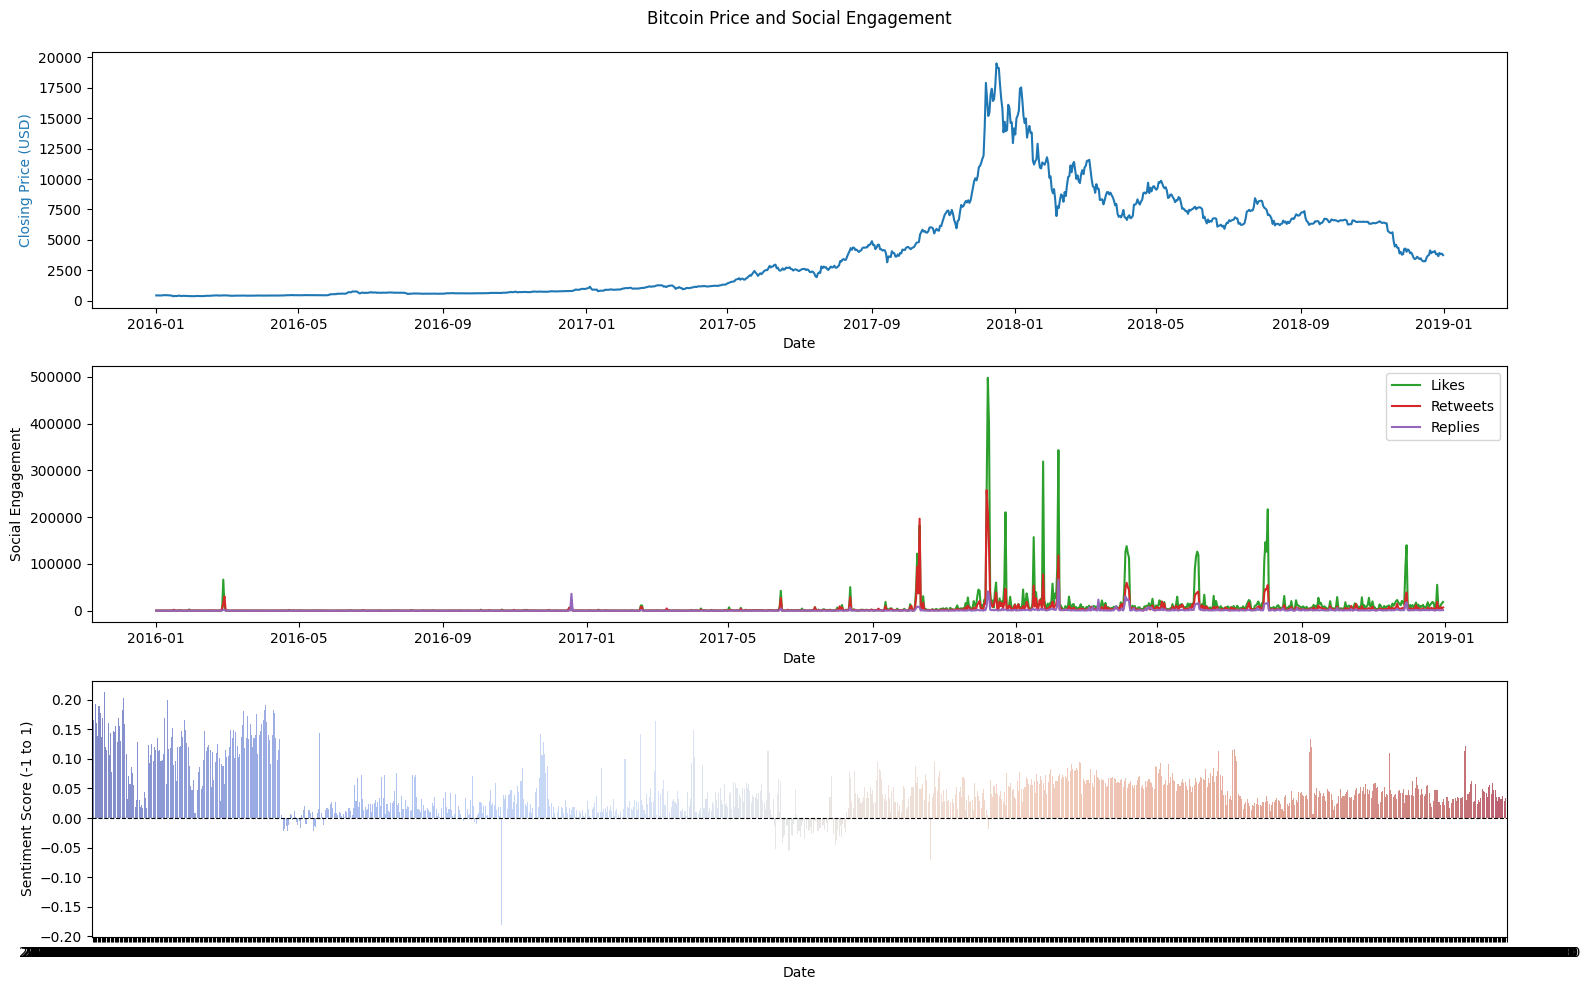

In [7]:
plt.figure(figsize=(16, 10))

# price subplot
ax1 = plt.subplot(3, 1, 1)
sns.lineplot(data=merged_df, x='Date', y='Close', color='#1f77b4')
plt.title('Bitcoin Price and Social Engagement', pad=20)
plt.ylabel('Closing Price (USD)', color='#1f77b4')

# social metrics mubplot
ax2 = plt.subplot(3, 1, 2)
sns.lineplot(data=merged_df, x='Date', y='likes', color='#2ca02c', label='Likes')
sns.lineplot(data=merged_df, x='Date', y='retweets', color='#d62728', label='Retweets')
sns.lineplot(data=merged_df, x='Date', y='replies', color='#9467bd', label='Replies')
plt.ylabel('Social Engagement')

# sentiment subplot
ax3 = plt.subplot(3, 1, 3)
sns.barplot(data=merged_df, x='Date', y='sentiment', 
           palette='coolwarm', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.ylabel('Sentiment Score (-1 to 1)')

plt.tight_layout()
plt.show()


In [8]:
# create heatmap on Close,Volume,sentiment,likes,retweets,replies using the provided code. seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

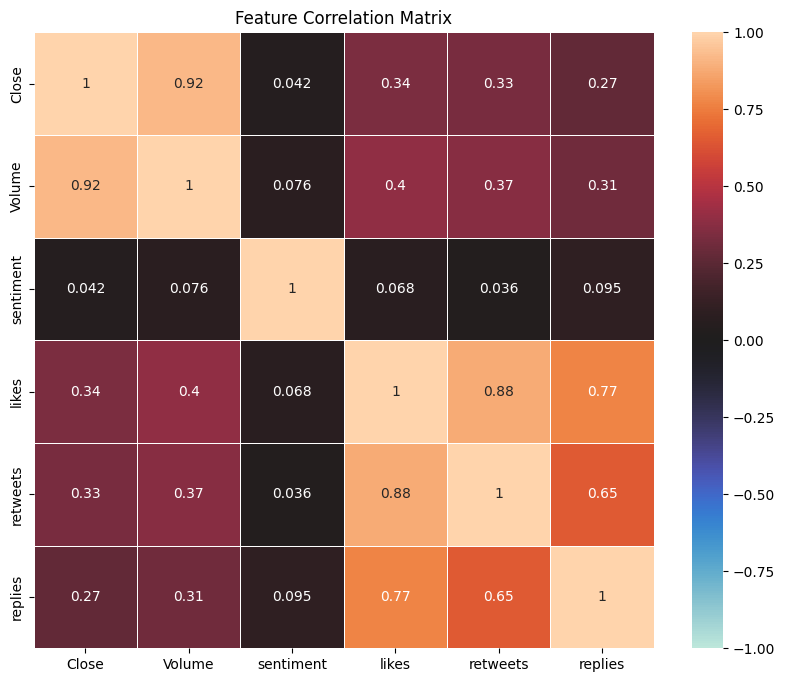

In [9]:
corr_matrix = merged_df[['Close', 'Volume', 'sentiment', 
                        'likes', 'retweets', 'replies']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='icefire', 
           vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


In [10]:
# create a lineplot between tabular data means Cost and volume with Date as y and tweets data with likes and retweets and date as y

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

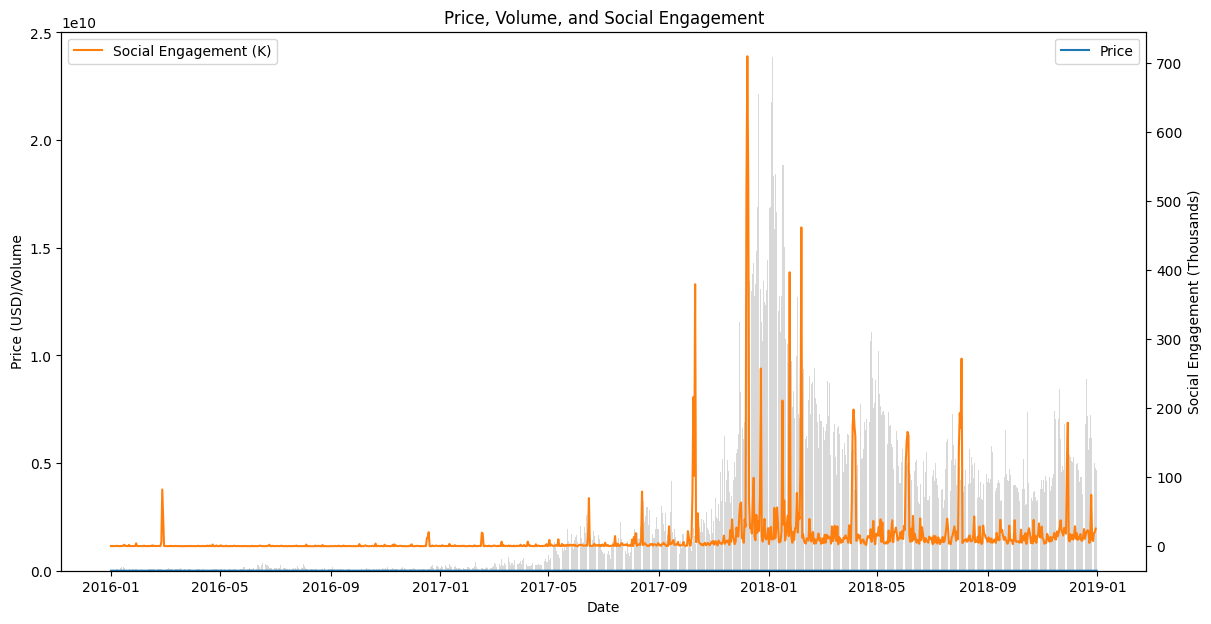

In [11]:
# Visualization 3: Price vs Social Activity

plt.figure(figsize=(14, 7))

# Price and Volume
ax1 = plt.gca()
sns.lineplot(data=merged_df, x='Date', y='Close', 
            color='#1f77b4', ax=ax1, label='Price')
plt.bar(merged_df['Date'], merged_df['Volume'], 
       color='#7f7f7f', alpha=0.3, label='Volume')

# Social Engagement
ax2 = plt.twinx()
sns.lineplot(data=merged_df, x='Date', 
            y=(merged_df['likes'] + merged_df['retweets'])/1000, 
            color='#ff7f0e', ax=ax2, label='Social Engagement (K)')

plt.title('Price, Volume, and Social Engagement')
ax1.set_ylabel('Price (USD)/Volume')
ax2.set_ylabel('Social Engagement (Thousands)')
plt.legend(loc='upper left')
plt.show()

In [12]:
prices_df = pd.read_csv('/kaggle/input/price-and-tweets/prices_data.csv', parse_dates=['Date'])
prices_df.sort_values('Date', inplace=True)

sns.set_style("whitegrid")
sns.set_context("talk")  
plt.rcParams['figure.dpi'] = 150 

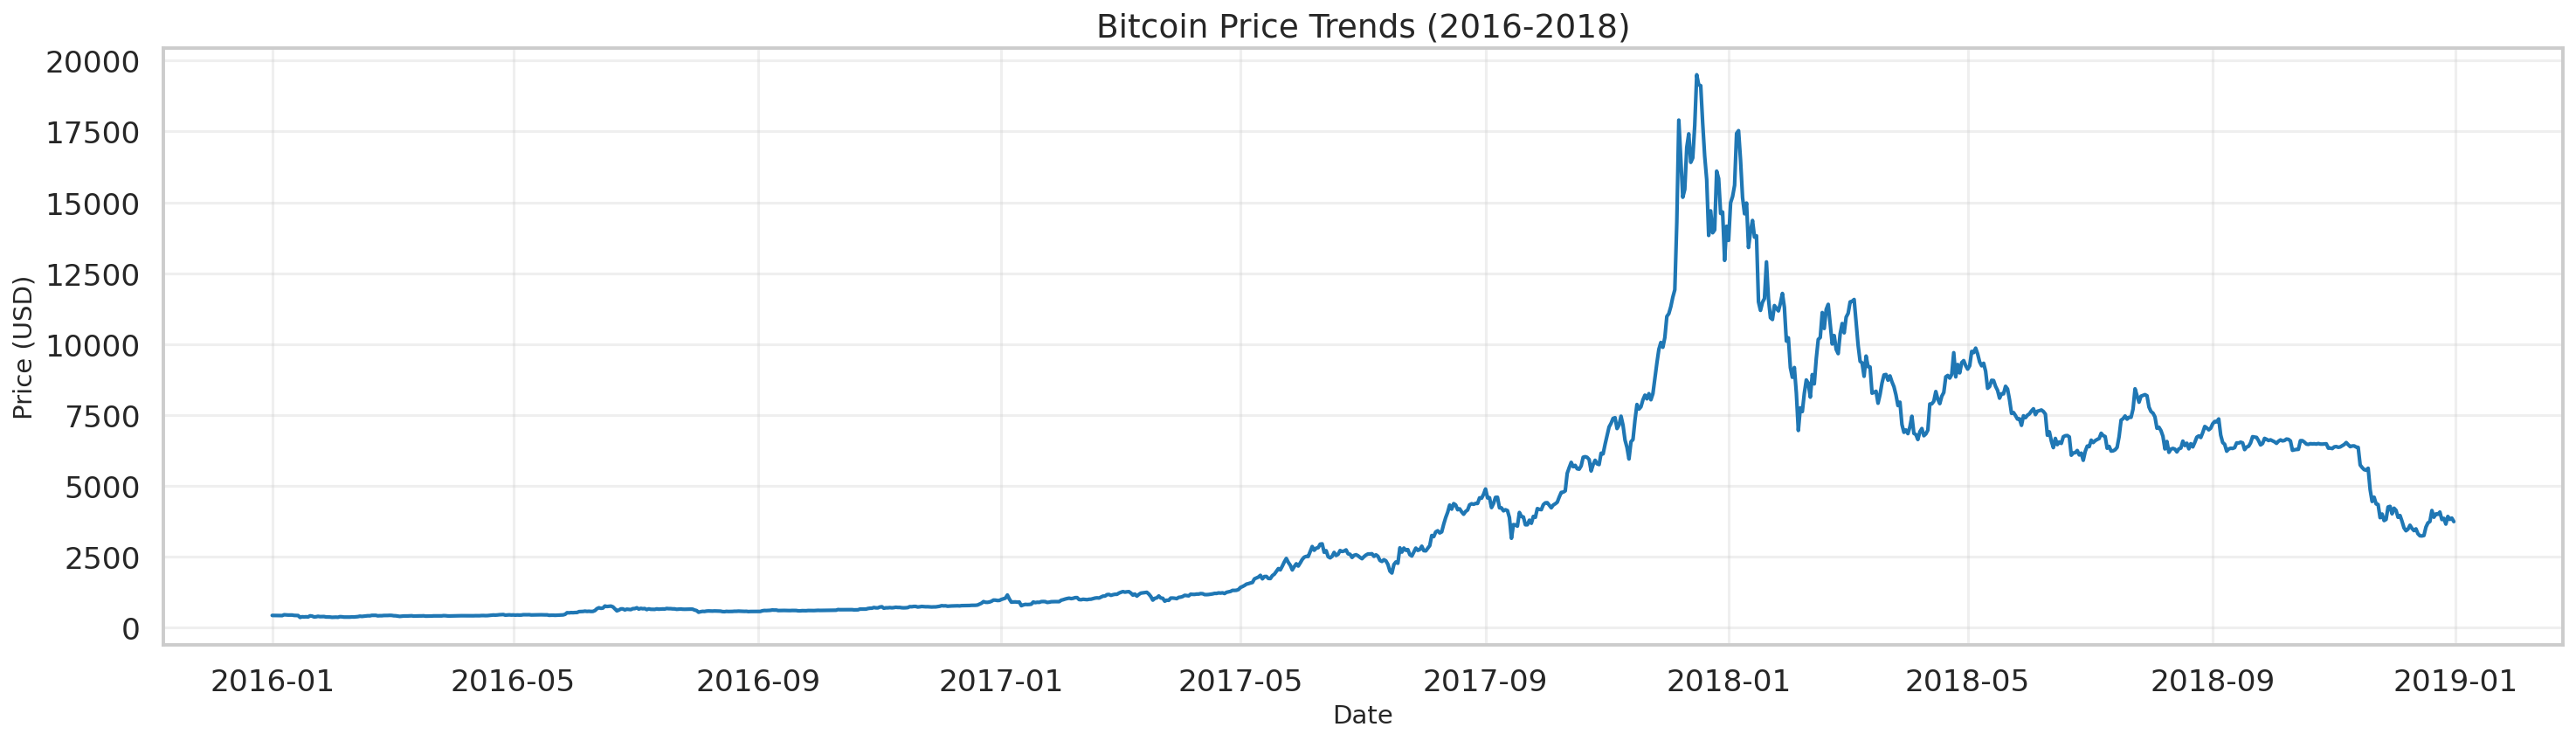

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(prices_df['Date'], prices_df['Close'], 
        linewidth=2, color='#1f77b4', label='Closing Price')
plt.title('Bitcoin Price Trends (2016-2018)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
# create a plot for volatility analysis on Low and High with date as y

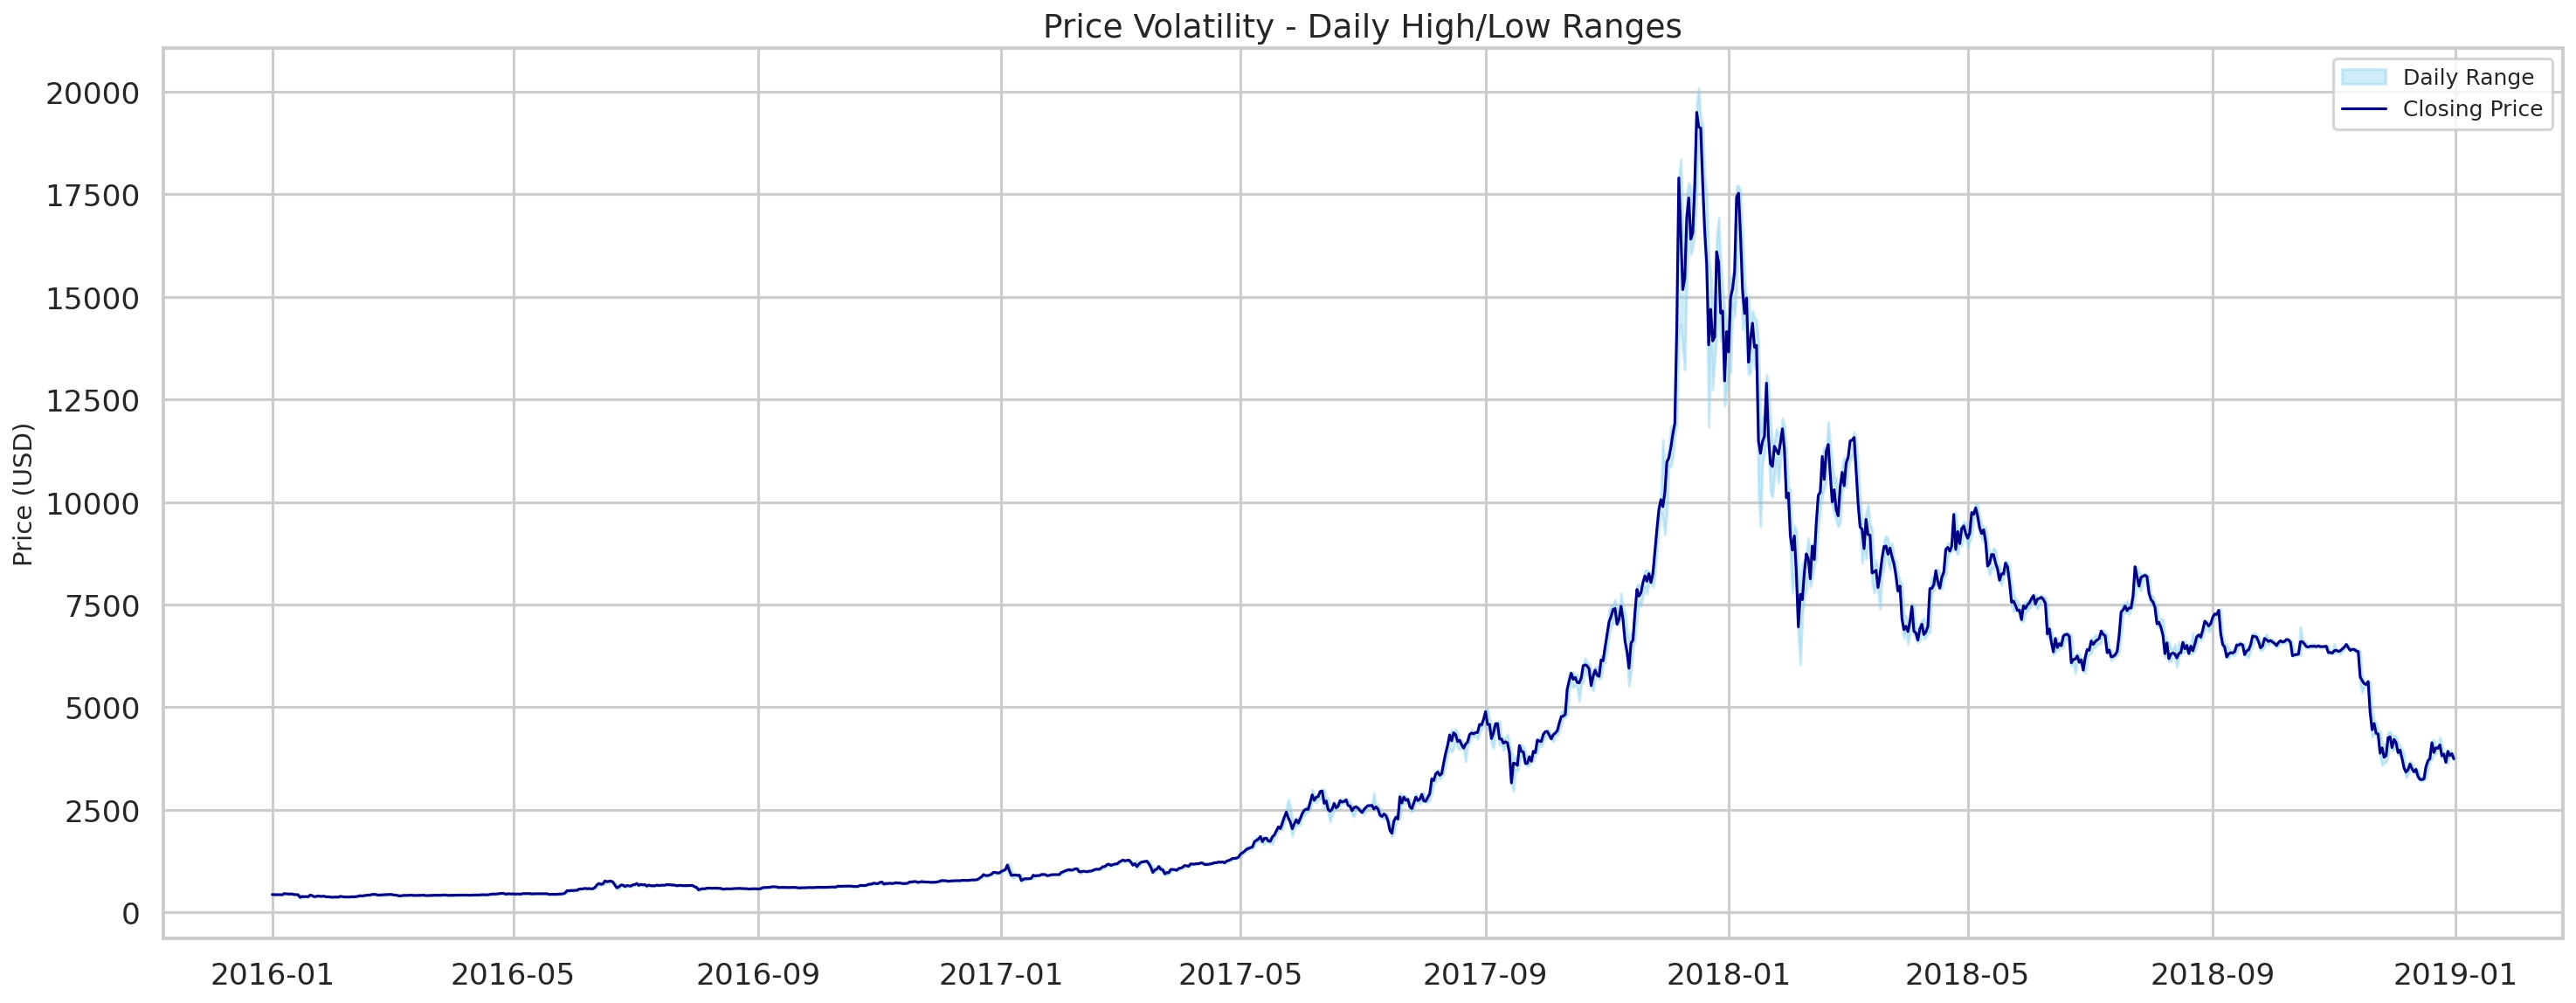

In [15]:
# 2. Volatility Analysis (OHLC)
plt.figure(figsize=(20, 8))
plt.fill_between(prices_df['Date'], 
                prices_df['Low'], 
                prices_df['High'], 
                color='skyblue', alpha=0.4, label='Daily Range')
plt.plot(prices_df['Date'], prices_df['Close'], 
        color='navy', linewidth=1.5, label='Closing Price')
plt.title('Price Volatility - Daily High/Low Ranges', fontsize=18)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
# create a bar chart for volume analysis on volume column with date as y. create a proper graph and adjust parameter

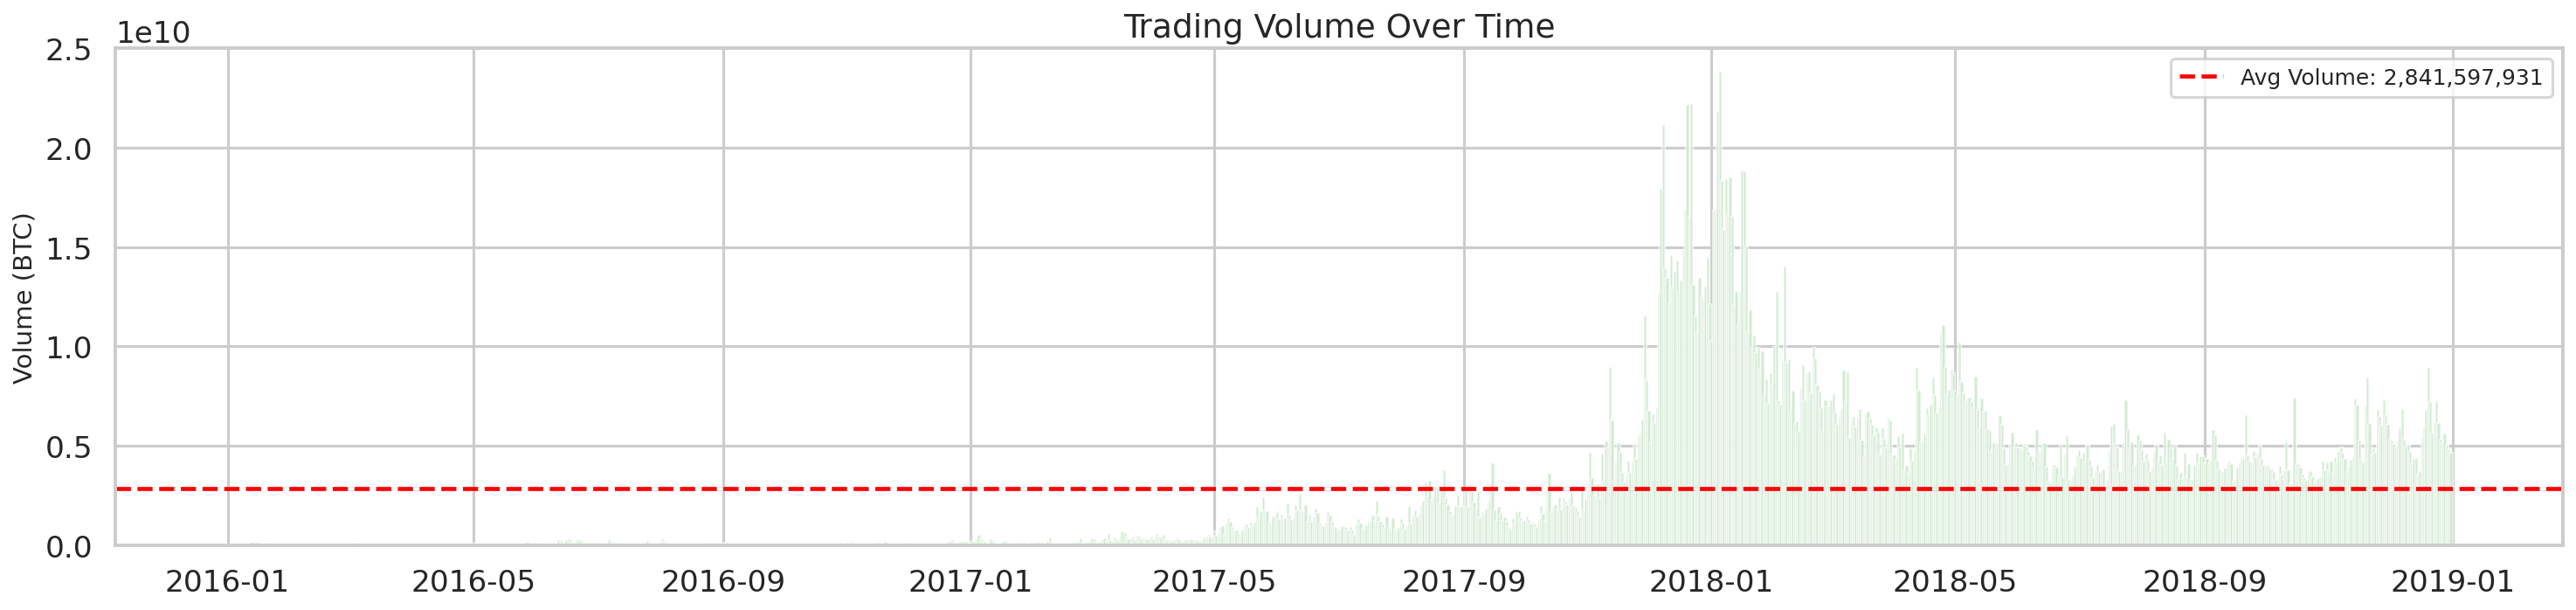

In [17]:
# 3. Volume Analysis
plt.figure(figsize=(20, 5))
plt.bar(prices_df['Date'], prices_df['Volume'], 
       color='#2ca02c', alpha=0.7, width=1)
plt.title('Trading Volume Over Time', fontsize=18)
plt.ylabel('Volume (BTC)', fontsize=14)
plt.axhline(y=prices_df['Volume'].mean(), 
           color='red', linestyle='--', 
           label=f'Avg Volume: {prices_df["Volume"].mean():,.0f}')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
# create a graph plot for moving averages of close column with 1 day, 7 day and 30 day windows and use different colors according to time windows and remember that current data is on daily basis

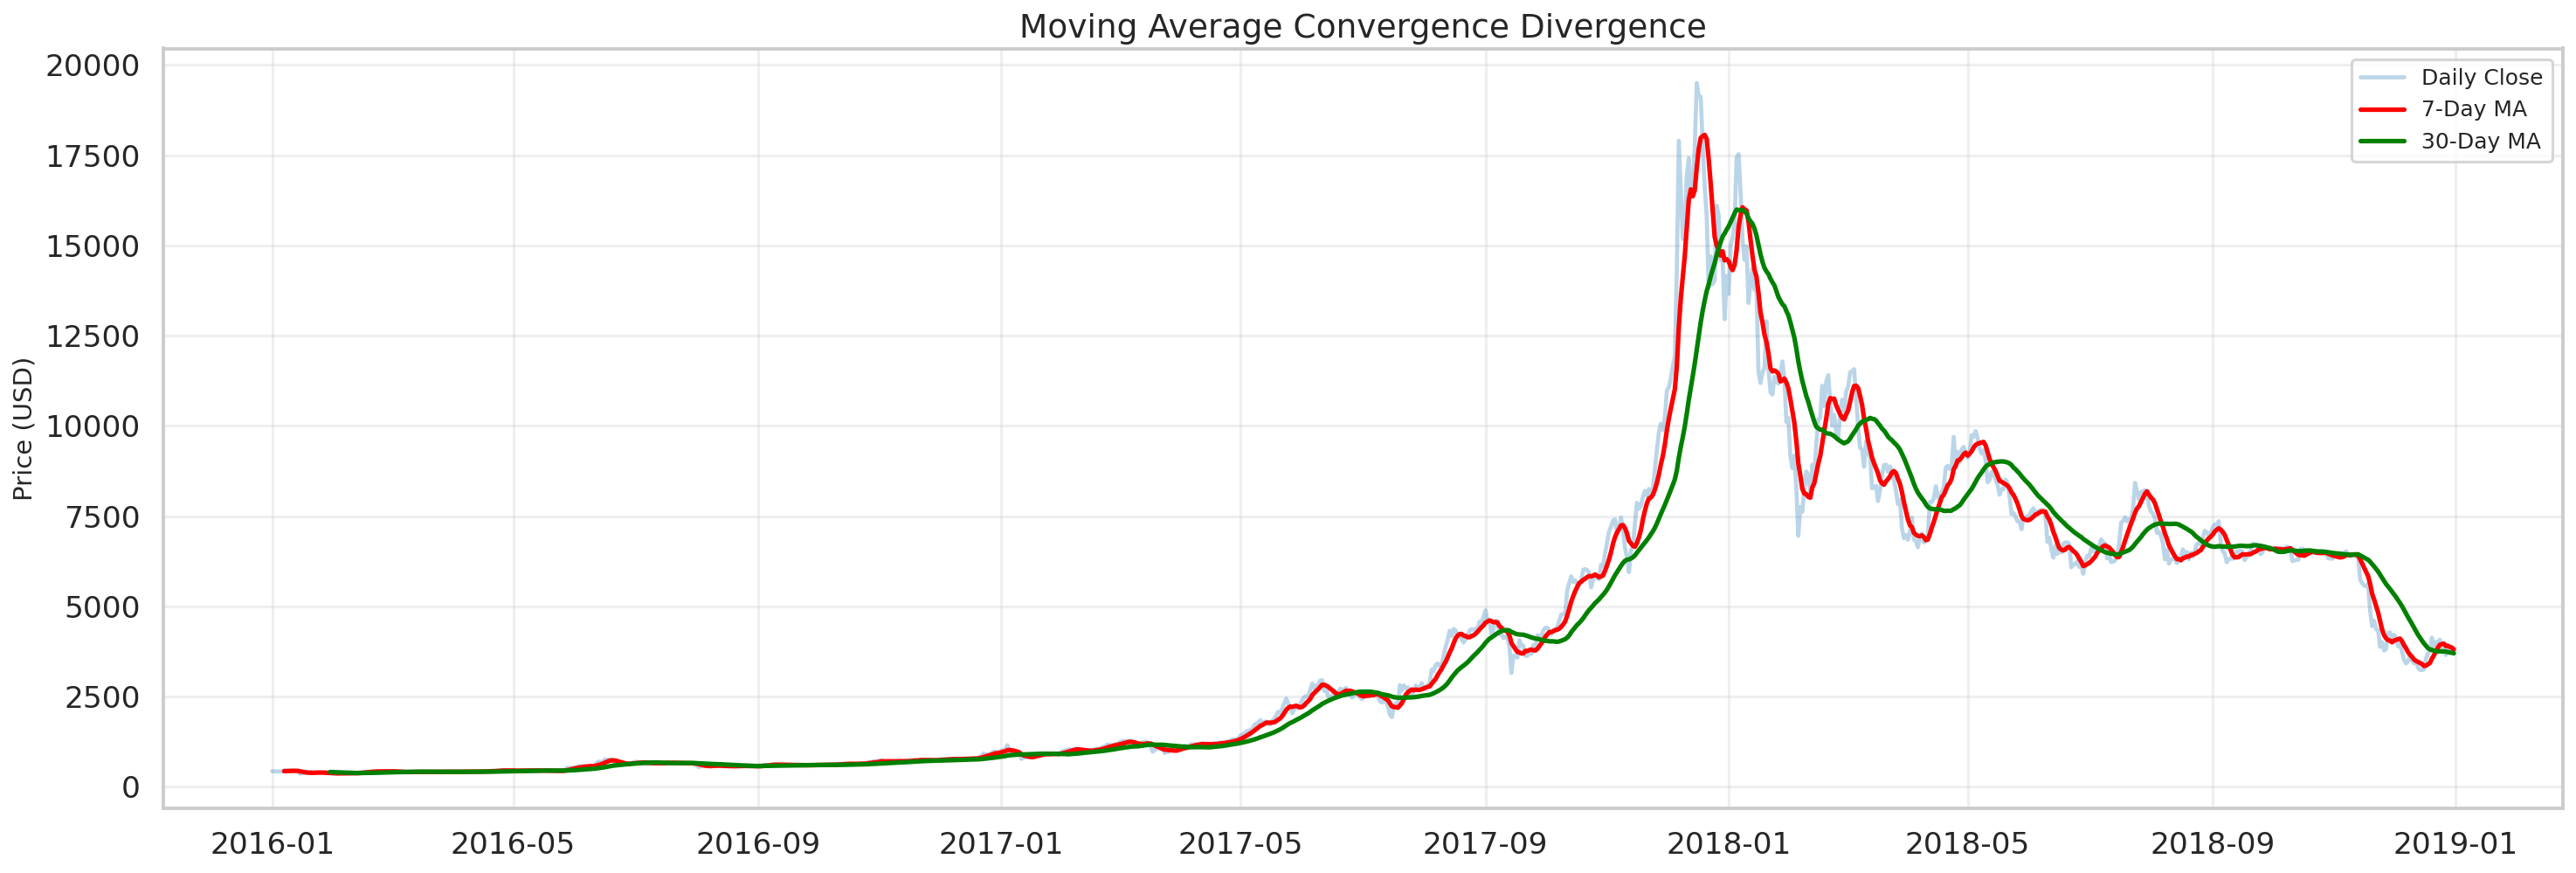

In [19]:
# 4. Moving Averages
plt.figure(figsize=(20, 7))
prices_df['7D_MA'] = prices_df['Close'].rolling(window=7).mean()
prices_df['30D_MA'] = prices_df['Close'].rolling(window=30).mean()

plt.plot(prices_df['Date'], prices_df['Close'], 
        alpha=0.3, label='Daily Close')
plt.plot(prices_df['Date'], prices_df['7D_MA'], 
        linewidth=2.5, color='red', label='7-Day MA')
plt.plot(prices_df['Date'], prices_df['30D_MA'], 
        linewidth=2.5, color='green', label='30-Day MA')

plt.title('Moving Average Convergence Divergence', fontsize=18)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

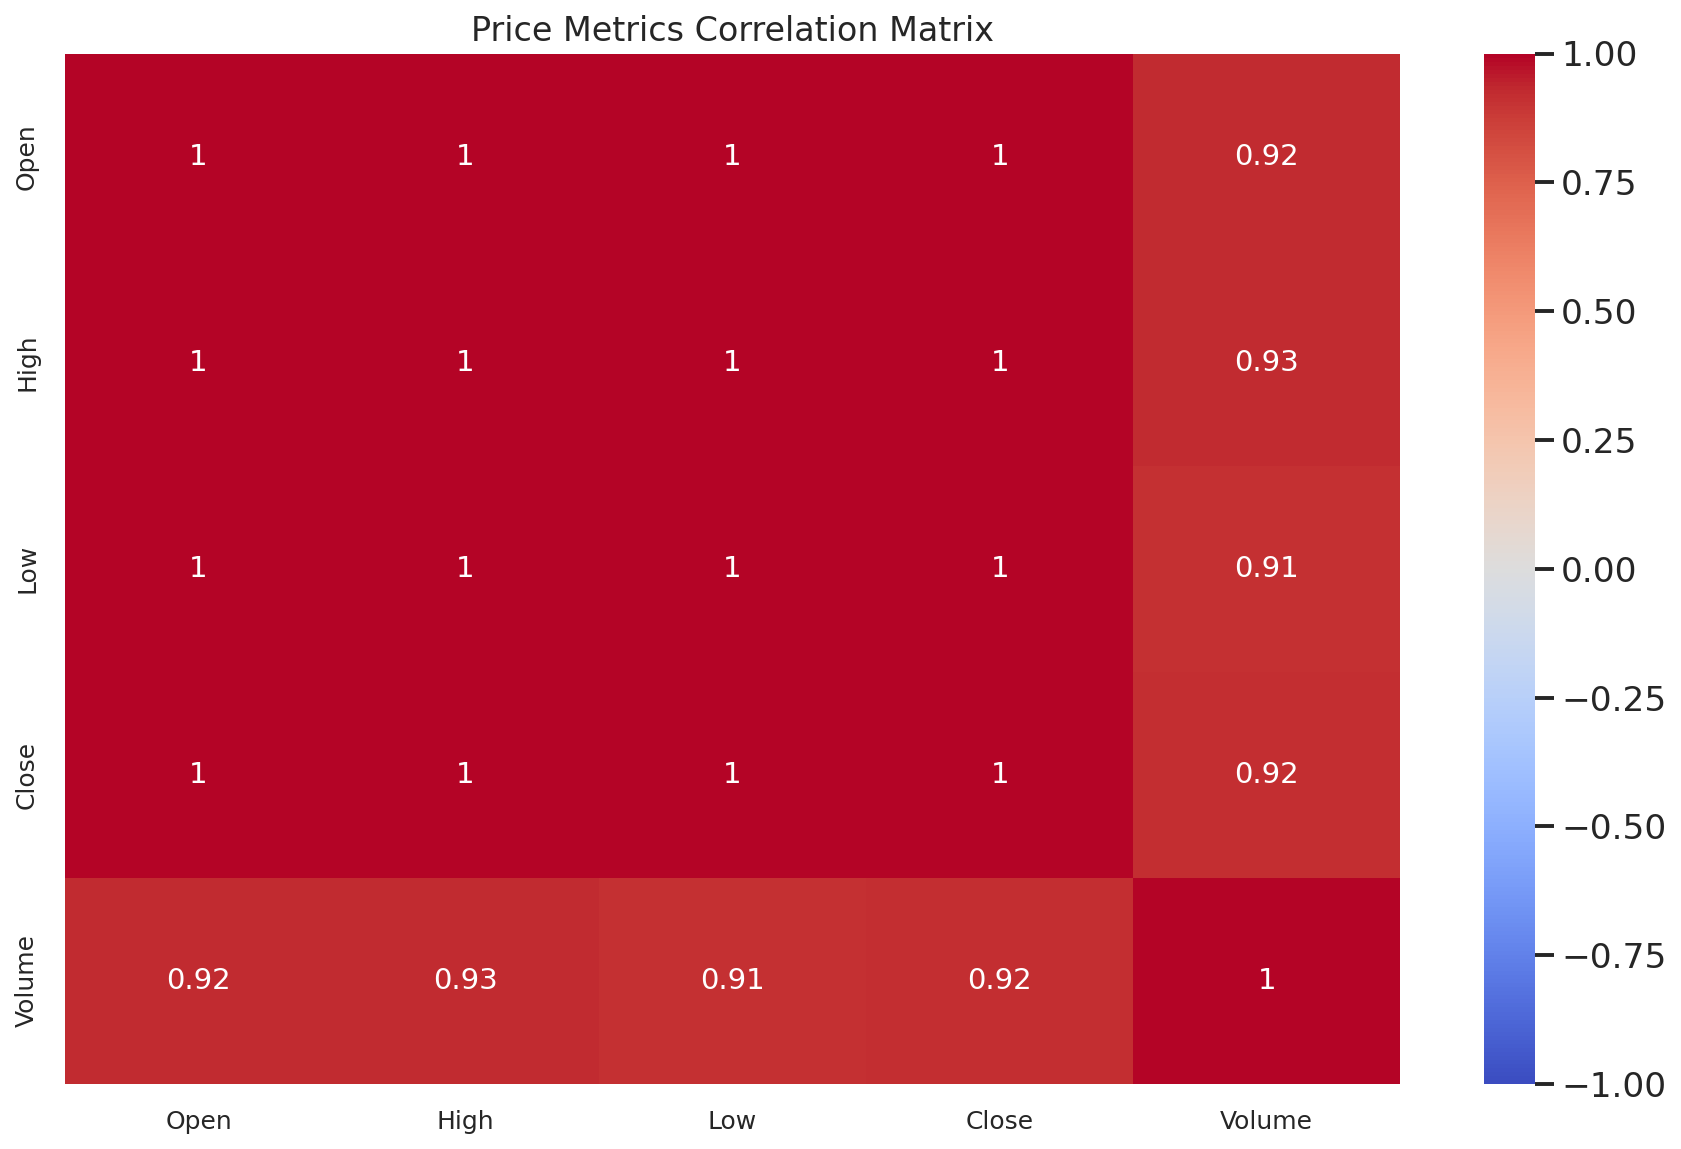

In [20]:
# 5. Correlation Matrix (Enhanced)
plt.figure(figsize=(12, 8))
corr_matrix = prices_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
           vmin=-1, vmax=1, annot_kws={"size": 14})
plt.title('Price Metrics Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


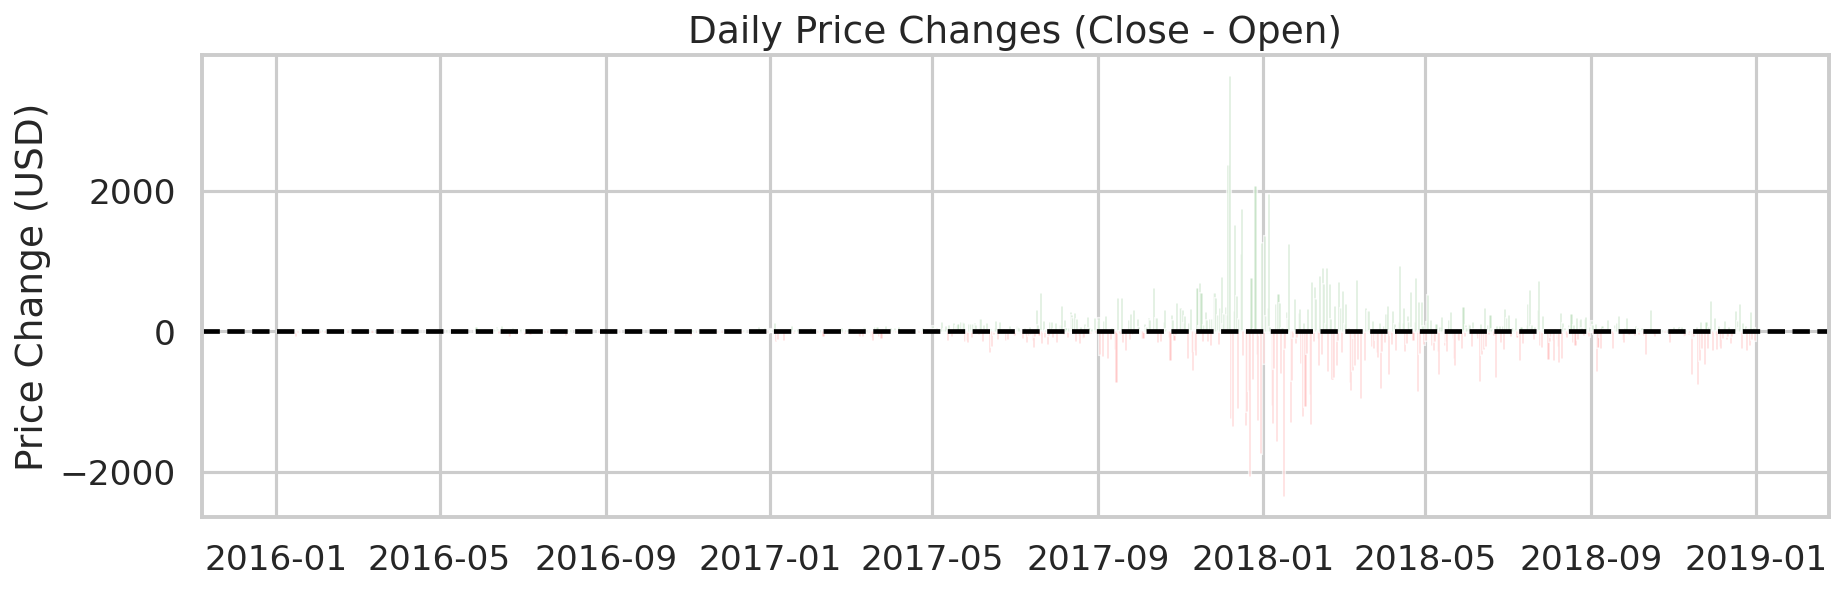

In [21]:
import numpy as np
# 6. Daily Price Changes
prices_df['Daily_Change'] = prices_df['Close'] - prices_df['Open']
plt.figure(figsize=(14, 4))
plt.bar(prices_df['Date'], prices_df['Daily_Change'], 
       color=np.where(prices_df['Daily_Change']<0, 'red', 'green'), 
       alpha=0.7)
plt.title('Daily Price Changes (Close - Open)')
plt.ylabel('Price Change (USD)')
plt.axhline(0, color='black', linestyle='--')
plt.show()